# 경사하강법 (Gradient Descent)

(본 실습 파일은 'PyTorch를 활용한 딥러닝 실습(이경록, 2024)'에 기반하여 작성되었습니다. Thanks to Teddylee!)

--

경사하강법 기본 개념 ==> 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 더이상 값이 변하지 않을 때까지 반복하는 것!

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식

In [ ]:
# 라이브러리 불러오기
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

## 샘플에 활용할 데이터 셋 만들기

In [ ]:
# 선형함수를 기반으로 샘플 데이터를 생성하고 시각화하는 함수
def make_linear(w=0.5, b=0.8, size=50, noise=1.0): # 기울기(가중치), 절편(편향), 데이터 개수, 잡음 정도 기본값 설정
    x = np.random.rand(size) # 입력값 x를 size만큼 0~1 사이의 무작위 실수들로 생성
    y = w * x + b # 선형함수 y = wx + b 계산
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # y의 개수만큼 -noise ~ +noise 사이의 균등분포에서 무작위 잡음 생성
    yy = y + noise # 계산된 y 값에 잡음 더하기
    plt.figure(figsize=(10, 7)) # 그래프 생성(가로 10인치, 세로 7인치)
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}') # 선형함수 y = wx + b를 빨간 선으로 시각화
    plt.scatter(x, yy, label='data') # 잡음이 포함된 yy 값을 점으로 시각화
    plt.legend(fontsize=15) # 글자크기 15로 범례 표시
    plt.show() # 그래프 출력
    print(f'w: {w}, b: {b}') # 기울기와 편향 값을 출력
    return x, yy # 생성된 x와 계산된 yy 값을 반환

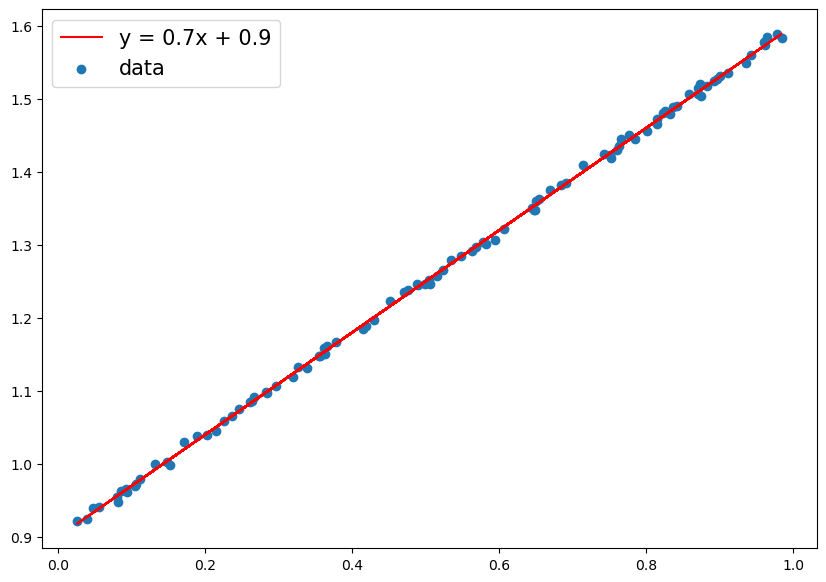

w: 0.7, b: 0.9


In [ ]:
x, y = make_linear(w=0.7, b=0.9, size=100, noise=0.01)

In [ ]:
x

In [ ]:
y

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정

In [ ]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

In [ ]:
w, b

`y_hat`은 `prediction`의 결과(값) --> 즉, 가설함수를 정의

In [ ]:
# 가설함수 정의하기
y_hat =

## 오차(Error) 정의

Loss Function 혹은 Cost Function 정의

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱의 평균**으로 정의

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표

In [ ]:
# Loss Function 정의 - MSE
error =

## 학습률 (Learning Rate)

In [ ]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png', width=700)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [ ]:
# 최대 반복 횟수
num_epoch =

# 학습률 (learning_rate)
learning_rate =

In [ ]:
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 가설 함수 설정


    # Loss Function - MSE 정의


    # 손실이 0.00005 보다 작으면 break



    # 경사하강법 계산 및 적용


    # errors(loss) 추가


    if epoch % 5 == 0:
        print("Epoch {0:2} w = {1:.5f}, b = {2:.5f}, error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("Epoch {0:2} w = {1:.1f}, b = {2:.1f}, error = {3:.5f}".format(epoch, w, b, error))

**시각화**

학습 진행(epoch)에 따른 오차를 시각화

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# 추가적인 내용 for advanced users

In [ ]:
# Batch Gradient Descent vs Stochastic Gradient Descent**
Image(url='https://editor.analyticsvidhya.com/uploads/58182variations_comparison.png')

In [ ]:
Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*9A0u4eeU_75bPgEuEwnwVQ.png')

Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*9A0u4eeU_75bPgEuEwnwVQ.png')